# Estimación de $\mu$ para Dijet

## Search for high mass dijet resonances with a new background prediction method in proton-proton collisions at $\sqrt{s} = $ 13 TeV

HEPData: https://www.hepdata.net/record/ins1764471

In [1]:
import pyhf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil
import json
import mplhep as mp

In [2]:
#Lectura y almacenamiento de los datos de la figura
eventYield = pd.read_csv("./Differential_dijet_spectrum_.csv", skiprows= list(np.arange(0,7, 1)) + list(np.arange(51, 94, 1)))
crossSection = pd.read_csv("./Differential_dijet_spectrum_.csv", skiprows= list(np.arange(0, 52, 1)))

In [3]:
#bins
DJL = eventYield["Dijet mass [GeV] LOW"]
DJH = eventYield["Dijet mass [GeV] HIGH"]

signalValues = np.random.normal(5000, 50, 1000)
signalCounts = []
for i in range(0,42):
    signalCounts.append(list((signalValues>DJL[i]) & (signalValues<DJH[i])).count(True))

In [4]:
#Definimos background, signal y data
Data = eventYield["Event yield"]
bkg = Data + 0.01*np.asarray([np.random.uniform(-1, 0)*i for i in Data])
bkgerr = 0.05*bkg*np.asarray([i*np.random.random() for i in np.ones_like(bkg)])
#bkgerr = 0.2*np.ones_like(bkg)
signal = np.asarray(signalCounts)*250/1000
signal

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   1.25, 221.25,  27.5 ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ])

In [5]:
df = pd.DataFrame({"DJ_bkg": bkg, "DJ_errbkg": bkgerr, "DJ_data" : Data, "DJ_signal" : signal})
df.to_csv("DJData.csv", index = False)

In [6]:
#Creamos el modelo
model = pyhf.simplemodels.uncorrelated_background(signal = list(signal), bkg = list(bkg), bkg_uncertainty = list(bkgerr))

In [7]:
#Calculamos el mu observado y esperado
observations = np.concatenate((Data, model.config.auxdata))
poi_values = np.linspace(0.01, 2, 100)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 0.2798
Upper limit (exp): μ = 0.2708


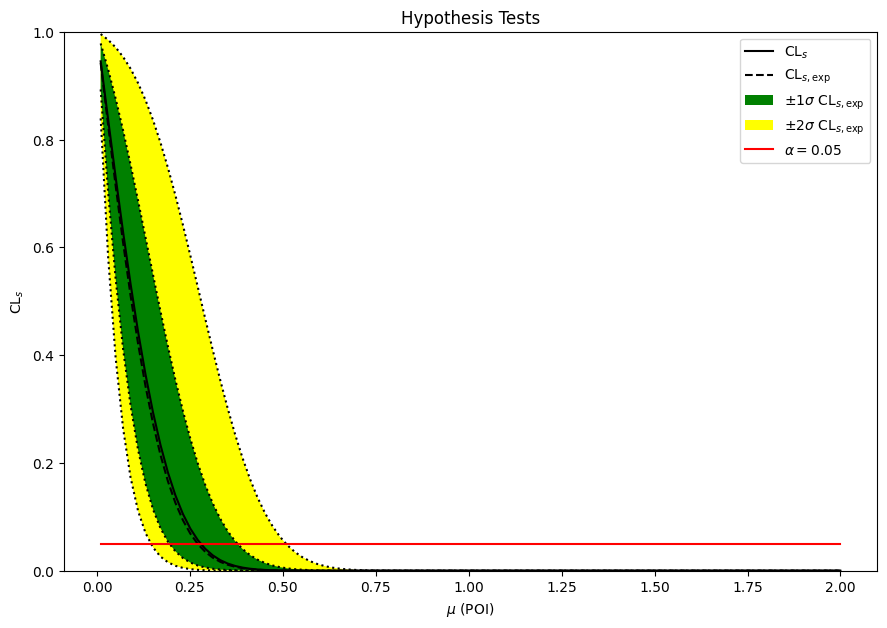

In [8]:
#Grafica de bandera
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)